# 3 Importance sampling

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

In [16]:
def load(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
        lines = text.split("\n")
        data = [tuple(map(float, line.split())) for line in lines if line.strip()]
    variables = list(zip(*data))

    return variables

## 3.1 
We are considering $f(x)=e^{-x^2}g(x)$ where g(x) is a slowly varying function. In particular, in the following case it has been considered $g(x)=x$.

The script to sample data (**ex3.1.cpp** in attachment) has been created in order to calculate the integral $I = \int_0^\infty f(x)$ with either crude Monte Carlo (*mode 0*) or the importance sampling method (*mode 1*).

Since crude Monte Carlo method expects that data are distributed according to a normalized uniform distribution, I had to shrink the domain from $[0, \infty]$ to $[0,c]$ where $c \rightarrow \infty$. Nevertheless, the negative exponential in the distribution $f(x)$ suppresses all $c >> 1$, therefore, we have chosen to keep a finite $c$ value.

The true integral value in this case is:
$$
I = \int_0^{\infty} e^{-x^2}x = \frac{1}{2}
$$

In crude Monte Carlo method, a random number $\xi$ is sampled from the uniform distribution $U(0,1)$ and multiplicated for the interval segment given by $c$. For n uniform sampled points: 
$$
I = \frac{c}{n}\sum_i^n f(\xi_i)
$$

Using Importance Sampling with a Gaussian random number generator (more precisely half-gaussian, since the interval is $[0, \infty]$) we consider:

$$
W(x) = N(0, \frac{1}{\sqrt{2}}) = \frac{2}{\sqrt{\pi}}e^{-x^2} \\
I = \int_0^\infty f(x) dx = \frac{1}{n} \sum_i^n \frac{f(u_i)}{W(u_i)} = \frac{\sqrt{\pi}}{2n} \sum_i^nu_i
$$

where $u_i$ points are sampled from $W(x)$.

In [3]:
range_p = [10, 100, 1000, 10000, 100000]
true_I = 0.5
c=100
for i, n in enumerate(range_p):
    print("n =",n)
    print("CRUDE MONTECARLO")
    points, fi = load("int_n{}_mode0.txt".format(n))
    I = round(c*sum(fi)/n,4)
    err_I = round(abs(I-true_I)/true_I*100,4)
    print("The integral results I = {} with err = {}%".format(I, err_I))
    print("IMPORTANCE SAMPLING")
    pts, gi = load("int_n{}_mode1.txt".format(n))
    I2 = round(math.sqrt(math.pi)/2*sum(gi)/n,4)
    err_I2 = round(abs(I2-true_I)/true_I*100,4)
    print("The integral results I = {} with err = {}%\n".format(I2, err_I2))

n = 10
CRUDE MONTECARLO
The integral results I = 0.0 with err = 100.0%
IMPORTANCE SAMPLING
The integral results I = 0.3114 with err = 37.72%

n = 100
CRUDE MONTECARLO
The integral results I = 0.1507 with err = 69.86%
IMPORTANCE SAMPLING
The integral results I = 0.461 with err = 7.8%

n = 1000
CRUDE MONTECARLO
The integral results I = 0.5082 with err = 1.64%
IMPORTANCE SAMPLING
The integral results I = 0.4978 with err = 0.44%

n = 10000
CRUDE MONTECARLO
The integral results I = 0.4998 with err = 0.04%
IMPORTANCE SAMPLING
The integral results I = 0.4993 with err = 0.14%

n = 100000
CRUDE MONTECARLO
The integral results I = 0.4977 with err = 0.46%
IMPORTANCE SAMPLING
The integral results I = 0.4994 with err = 0.12%



We can observe that using Importance Sampling instead of Crude Monte Carlo allows to sample less points (100) in order to obtain an accuracy $> 90$%. Increasing the number of samples, both methods converge to a satisfying integral result.

## 3.2

We want to estimate the following integral:
$$
I = \int_0^{\pi/2} cosx dx.
$$
We can consider the distribution $g(x)= a + bx^2$, whose cumulative is:
$$
G(x) = ax+\frac{b}{3}x^3
$$
with the condition $b = \frac{12}{\pi^3}(2-\pi a)$ to guarantee normalization, returning:
$$
g(x) = a + \frac{12}{\pi^3}(2-a \pi)x^2 \\
G(x) = ax + \frac{4}{\pi^3}(2-a\pi)x^3
$$
In order to perform importance sampling, we should guarantee that $\frac{cos(x)}{g(x)} \sim const$. Some possible values of $a$ are plot in the preliminary analysis, in order to avoid divergence of the ratio and minimize the variace of the ratio given $x \in [0, \pi/2]$: the findings show that $a \sim 0.95$ is the optimal choice.

Since $G(x)$ is not invertable, we can sample from this distribution using the rejection method.
This can be done using the function defined in exercise **3.1**:

$$
s(x) = 
\begin{cases}
\frac{2p}{2p^2+1} \qquad \qquad \textit{if } 0 \leq x \leq p \\
\frac{2}{2p^2+1}xe^{p^2-x^2} \qquad  \textit{if } x>p
\end{cases}
$$

Since $s(x)$ is invertable:

$$
S^{-1}(\xi) =
\begin{cases}
\frac{2p^2+1}{2p}\xi \qquad \qquad \qquad \qquad \qquad \quad \textit{if } 0 \leq \xi \leq \frac{2p^2}{2p^2+1} \\
\sqrt{p^2-ln(1-\xi(2p^2+1)+2p^2))} \qquad  \textit{if } \xi > \frac{2p^2}{2p^2+1}
\end{cases}
$$

where $\xi$ points are sampled from a uniform distribution $U(0,1)$.
$S^{-1}(\xi)$ is implemented in **ex3.2.cpp** script (in attachment), where the user can give the number of points to sample and $p$ as inputs (while $c$ has been chosen such that $c = \frac{2p}{p^2+1} g(0)$ to guarantee that $g(x) \leq c s(x) \quad \forall x$), receiving in output the accepted and rejected samples in two different .txt files. The results are creating considering $p=0.7$, the optimal value found during the preliminary analysis.

The integral is therefore calculated using the importance sampling:
$$
I = \frac{1}{N}\sum_{i=1}^{N} \frac{cos(x_i)}{g(x_i)}
$$
where all the $x_i$ are the accepted samples generated by the script.


For a=0.5, the ratio between g(x) and cos(x) is 1.122 +/ 0.656
For a=0.7, the ratio between g(x) and cos(x) is 0.96 +/ 0.426
For a=0.9, the ratio between g(x) and cos(x) is 0.918 +/ 0.234
For a=0.95, the ratio between g(x) and cos(x) is 0.951 +/ 0.135


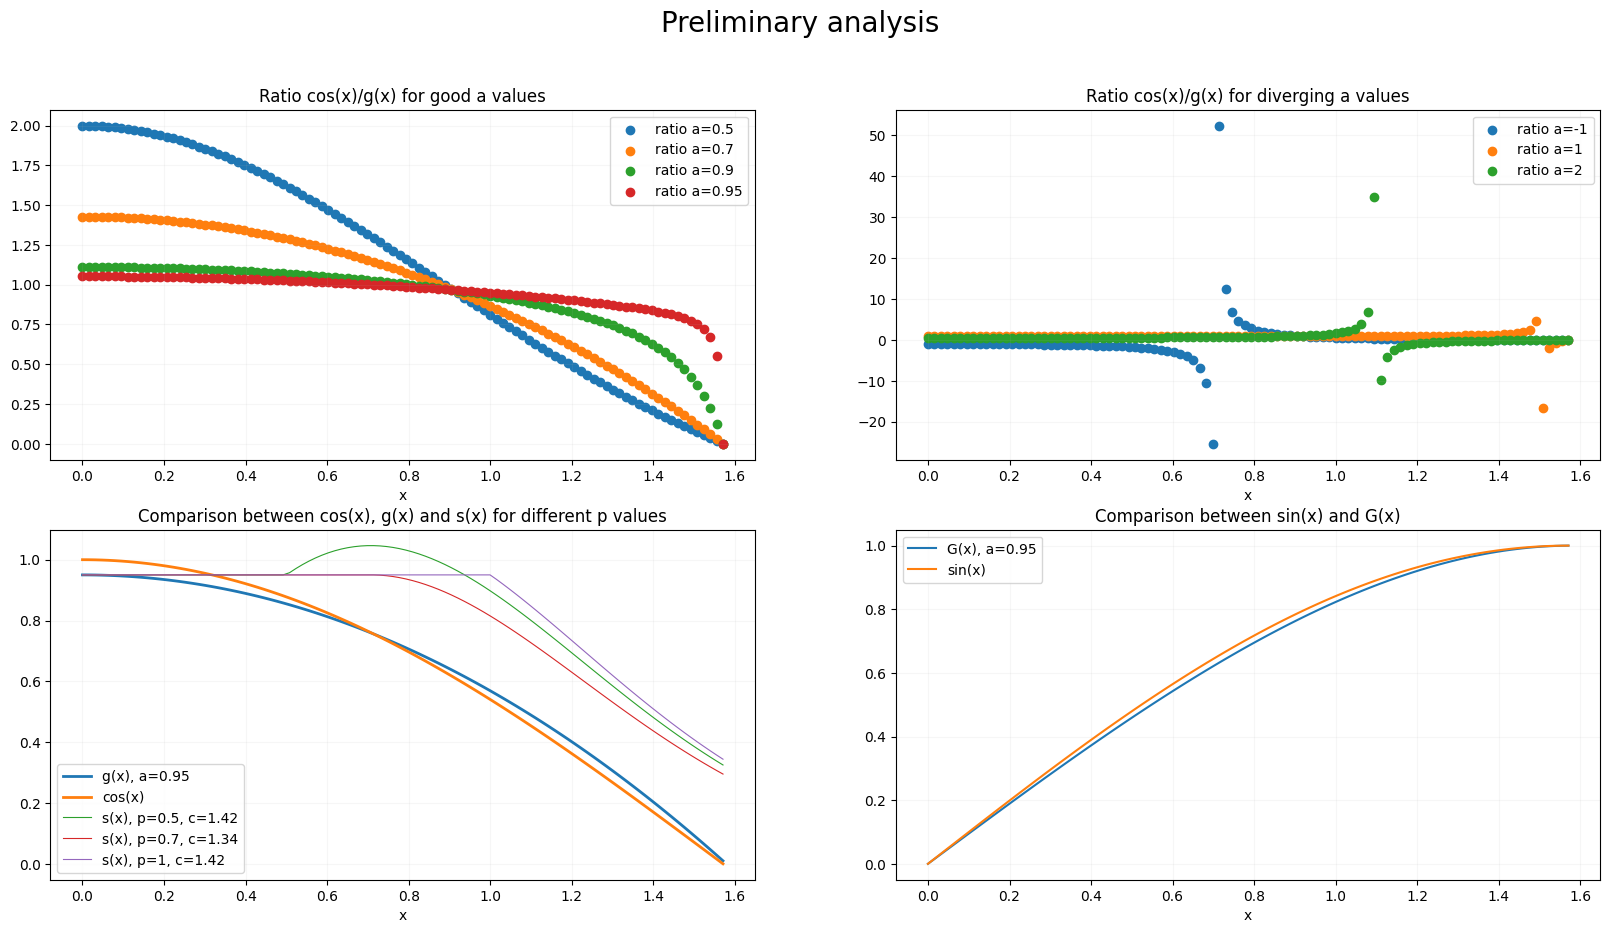

In [4]:
domain = np.linspace(0,math.pi/2,100)
def g(x,a):
    # return 1+12/math.pi**3*(2-math.pi)*x**2
    return a+ (1-a*math.pi/2)*24/math.pi**3*x**2
def G(x, a):
    return a*x+4/math.pi**3*(2-a*math.pi)*x**3
def s(x,p):
    a = np.zeros(shape=x.shape)
    for i, ics in enumerate(x):
        if ics <= p:
            a[i] = 2*p/(2*p**2+1)
        else:
            a[i] = 2/(2*p**2+1) * ics * np.exp(p**2 - ics**2)
    return a
a_bad = [-1,1,2]
a_range=[0.5, 0.7, 0.9, 0.95]
p_range = [0.5,0.7,1]
a_ = 0.95
p = 0.7
c = (2*p**2+1)/(2*p)*g(0, a_)
# I want to check numerically that the ratio between cos(x) and g(x) is constant
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.suptitle("Preliminary analysis",fontsize=20)
ax[0][0].set_title("Ratio cos(x)/g(x) for good a values")
ax[0][1].set_title("Ratio cos(x)/g(x) for diverging a values")
ax[1][0].set_title("Comparison between cos(x), g(x) and s(x) for different p values")
ax[1][1].set_title("Comparison between sin(x) and G(x)")

for a in a_range:
    ratios = np.cos(domain)/g(domain, a)
    variance = sum(ratios**2)/len(domain) - (sum(ratios)/len(domain))**2
    print("For a={}, the ratio between g(x) and cos(x) is {} +/ {}".format(a, round(sum(ratios)/len(ratios),3), round(np.sqrt(variance),3)))
    ax[0][0].scatter(domain, ratios, label="ratio a={}".format(a))
    
for a in a_bad:
    ratios = np.cos(domain)/g(domain, a)
    ax[0][1].scatter(domain, ratios, label="ratio a={}".format(a))

ax[1][0].plot(domain, g(domain, a_), label="g(x), a={}".format(a_),linewidth=2)
ax[1][1].plot(domain, G(domain, a_), label="G(x), a={}".format(a_))     
ax[1][0].plot(domain, np.cos(domain), label="cos(x)",linewidth=2)
ax[1][1].plot(domain, np.sin(domain), label="sin(x)")

for p_ in p_range:
    c_ = (2*p_**2+1)/(2*p_)*g(0, a_)
    ax[1][0].plot(domain, c_*s(domain, p_), label="s(x), p={}, c={}".format(p_,round(c_,2)),linewidth=0.8)
    
for i,j in [(i,j) for i in range(2) for j in range(2)]:
    ax[i][j].legend()
    ax[i][j].set_xlabel("x")
    ax[i][j].grid(alpha=0.1)

For 5 darts and 4 accepted points, the integer is I=0.929 with 7.097% error
For 10 darts and 8 accepted points, the integer is I=0.97 with 2.954% error
For 15 darts and 12 accepted points, the integer is I=0.997 with 0.32% error
For 500 darts and 375 accepted points, the integer is I=0.994 with 0.579% error
For 1000 darts and 734 accepted points, the integer is I=0.999 with 0.119% error
For 5000 darts and 3752 accepted points, the integer is I=1.0 with 0.033% error


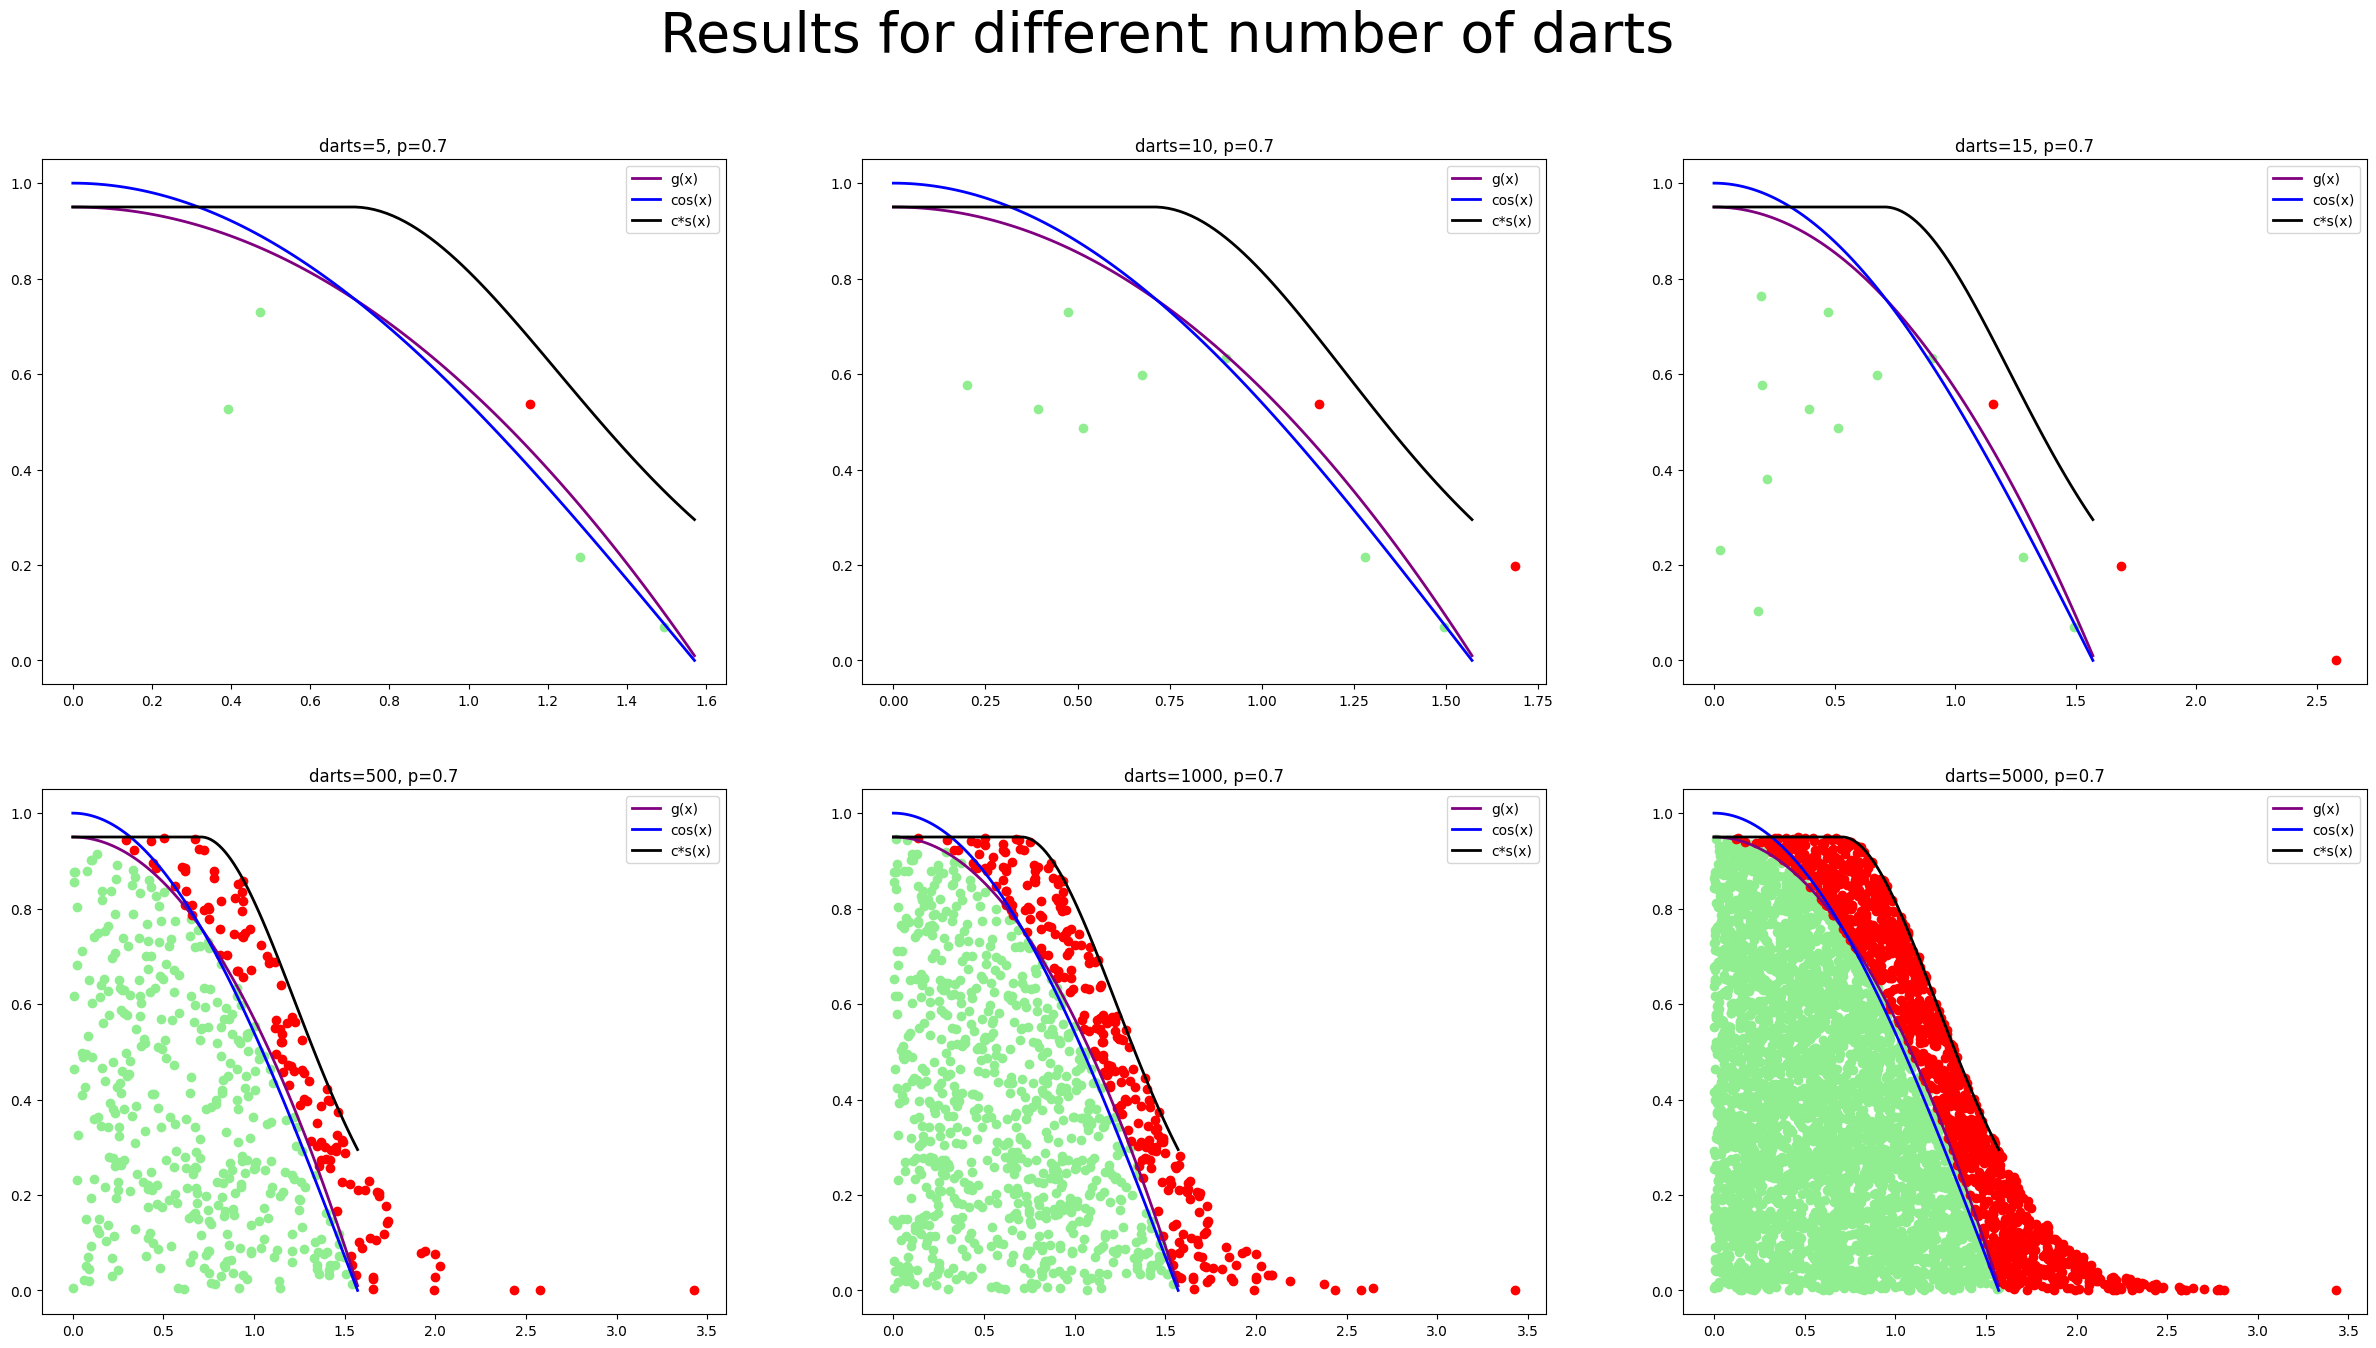

In [5]:
n = [5, 10, 15, 500, 1000, 5000]
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(30,15))
fig.suptitle("Results for different number of darts",fontsize=40)
for i,n in enumerate(n):
    x_ok, chi_ok = load("imp_rej_n{}_p{}_ok.txt".format(n,p))
    ratio = np.cos(x_ok)/g(np.array(x_ok), a_)
    I_exp = 1/len(x_ok)*sum(ratio)
    print("For {} darts and {} accepted points, the integer is I={} with {}% error".format(n, len(x_ok), round(I_exp,3), round(abs(1-I_exp)*100,3)))
    x_no, chi_no = load("imp_rej_n{}_p{}_no.txt".format(n,p))
    ax[(i//3)][(i%3)].plot(domain, g(domain, a_), label = "g(x)",linewidth=2,color="purple")
    ax[(i//3)][(i%3)].plot(domain, np.cos(domain), label = "cos(x)",linewidth=2,color="blue")
    ax[(i//3)][(i%3)].scatter(x_ok,np.array(chi_ok)*c*s(np.array(x_ok),p), color="lightgreen")
    ax[(i//3)][(i%3)].scatter(x_no,np.array(chi_no)*c*s(np.array(x_no),p), color="red")
    ax[(i//3)][(i%3)].plot(domain, c*s(domain,p), label = "c*s(x)",color="black",linewidth=2)
    ax[(i//3)][(i%3)].set_title("darts={}, p={}".format(n,p))
    ax[(i//3)][(i%3)].legend(loc="best")
plt.show()

The results show that using the optimal parameters $a$, $p$ and $c$ it is possible to obtain an integral's accuracy of above $99$% using only 15 darts with 12 accepted points. The integral's accuracy reach $\sim 99.97$% for 5000 darts and 3752 accepted points.

## 3.3
Given the function $f(x)$

$$
f(x)= \begin{cases}
0 \quad for \quad x<T \\
1 \quad for \quad x \geq T
\end{cases}
$$

the average with respect to the PDF $\rho(x) = e^{-x}$, defined for $x \geq 0$, is:

$$
\langle f \rangle _{\rho} = \int _{\mathbb{R_+}} {f(x) \, \rho(x) \, dx} = \int _{T} ^{\infty} {e^{-x} \, dx} = e^{-T} ,
$$


The variance results instead: 
$$
\sigma ^2 (f) = \langle f^2 \rangle _{\rho} - \langle f \rangle^2 _{\rho} = \int _{T} ^{\infty} e^{-x}dx -e^{-2T} = e^{-T}(1-e^{-T}) = \langle f \rangle _{\rho} \, \big( \,1 - \langle f \rangle _{\rho} \, \big)
$$

Given $g(a,x)=a\,e^{-ax}$ and $F(x, a)=f(x)\frac{\rho(x)}{g(a, x)}$, one can find the variance of $F$ according to measure $g(a, x)$: 

$$
\sigma ^2 (\, a, F \,)= \langle F^2 \rangle_g -\langle F \rangle^2_g =  \int _{\mathbb{R_+}} {\big[ \, \frac{f(x)\rho (x)}{g(a,x)}\big]^2 \, g(a,x) \, dx} - \langle f \rangle^2 _{\rho} = \\ = \frac{1}{a} \int _{T} ^{\infty} e^{(a-2)x}dx -e^{-2T} = \frac{e^{-(2-a)T}}{a(2-a)}-e^{-2T}
$$
where it has been observed that $\langle F \rangle_g = \langle f \rangle_{\rho}$

It's possible to derivate to find the $a^*$ which minimizes the variance:

$$ 
\frac{\partial \sigma ^2}{\partial a}(\, a, F(x, a) \,)=\frac{1}{a^2(2-a)^2} \big[a\,(2-a) \, T \cdot e^{-T(2-a)} - e^{-T(2-a)} \cdot (2-2a) \big] = 0  \implies a\,(2-a) T = (2-2a) 
$$

This leads to a simple second order equation:
$-a^2 T +a(2T+2)-2=0 \implies a_{1,2} = \frac{T+1  \mp \sqrt{T^2 +1 }}{T} .$
Since we are interested in the $a \in ]0,1]$ interval, we shall take the solution with the minus sign. Thus
$a^* = \frac{T+1 - \sqrt{T^2+1}}{T}$.

C:\Users\Elena Zoppellari\AppData\Local\Temp\ipykernel_11884\1210340791.py:2: RuntimeWarning: divide by zero encountered in divide
  return (np.exp(-T * (2 - a)) / (a * (2 - a))) - np.exp(-2 * T)


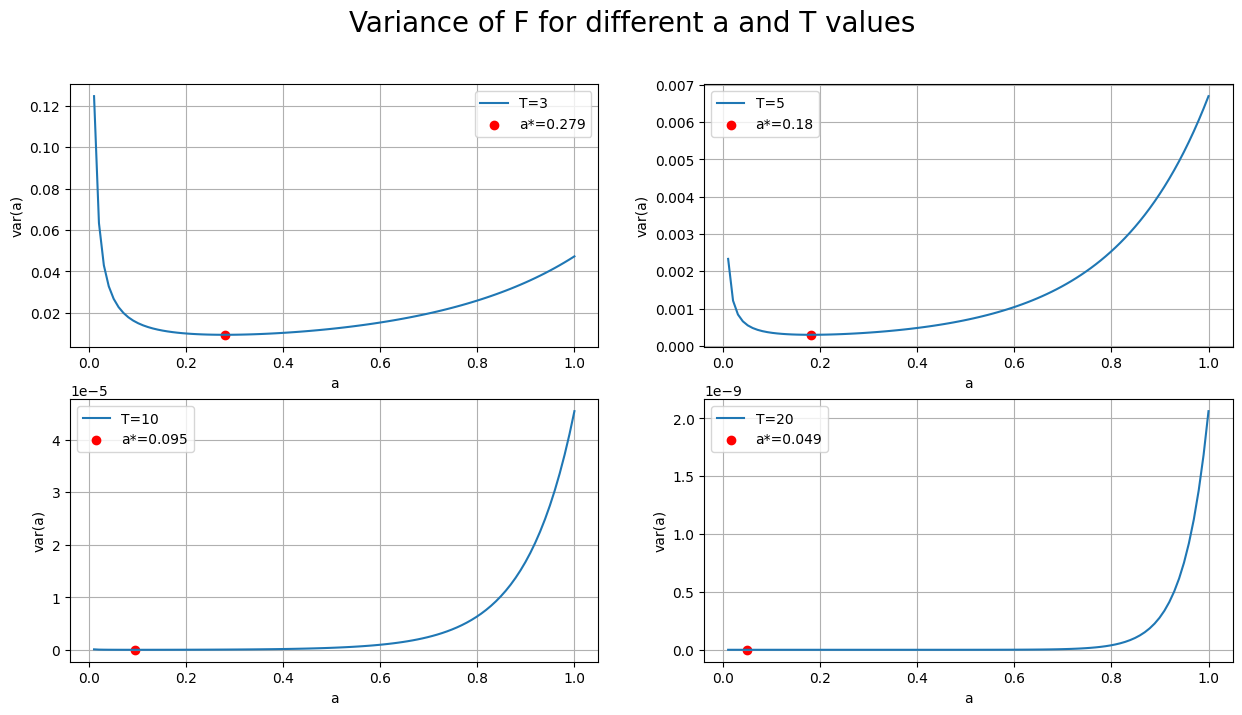

In [6]:
def var(a, T):
    return (np.exp(-T * (2 - a)) / (a * (2 - a))) - np.exp(-2 * T)

# a that minimize the variance
def a_star(T):
    return (T+1-(T**2+1)**0.5)/T

a_values = np.linspace(0, 1.0, 100) 
T_values = [3, 5, 10, 20]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,7.5))
fig.suptitle("Variance of F for different a and T values",fontsize=20)
for i, T in enumerate(T_values):
    ax[i//2][i%2].plot(a_values, var(a_values, T), label="T={}".format(T))
    ax[i//2][i%2].scatter(a_star(T), var(a_star(T), T), label="a*={}".format(round(a_star(T),3)), color="red")
    ax[i//2][i%2].set_xlabel("a")
    ax[i//2][i%2].set_ylabel("var(a)")
    ax[i//2][i%2].legend()
    ax[i//2][i%2].grid()

In the above paragraph we observed that $ \langle f \rangle_{\rho} = \langle F \rangle_{g} = \langle \frac{f \rho}{g} \rangle_{g} $, while $\sigma (f) \neq \sigma (\, a, F \,) := \sigma(F)$. Therefore we expect that the ratio between them will be greater than 1, and that the dispersion of $f(x)$ will be different according to the chosen measure.
In order to quantify these differences, we calculate the following values:

$$
1. \frac{\sigma (f)}{\langle f \rangle}, \quad 2. \frac{\sigma (\, F \,)}{\langle f \rangle}, \quad 3. \frac{\sigma (f)}{\sigma (\, F \,)}
$$

The orders of magnitude of $\langle f \rangle$, $\sigma(f)$ and $\sigma(F)$ are also highlighted.

In [7]:
def avg_f(T):
    return np.exp(-T)

def sigma_f(T):
    return np.sqrt(avg_f(T)*(1-avg_f(T)))

def sigma(a, T):
    return np.sqrt((np.exp(-T * (2 - a)) / (a * (2 - a))) - np.exp(-2 * T))

def magnitude(number):
    return math.floor(math.log(number, 10))

for i, T in enumerate(T_values):
    est1 = sigma_f(T)/avg_f(T)
    est2 = sigma(a_star(T), T)/avg_f(T)
    est3 = sigma_f(T)/sigma(a_star(T), T)
    print("For T={}, a*={}, the three values are:\n1. sigma(f)/<f> = {}, 2. sigma(F)/<f> = {}, sigma(f)/sigma(F) = {}".format(T, round(a_star(T),3),  round(est1,9),  round(est2,8),  round(est3,3)))
    print("The order of magnitude are {} for <f>, {} for sigma(f), {} for sigma(F)\n".format(magnitude(avg_f(T)), magnitude(sigma_f(T)), magnitude(sigma(a_star(T), T))))

For T=3, a*=0.279, the three values are:
1. sigma(f)/<f> = 4.368699683, 2. sigma(F)/<f> = 1.95184884, sigma(f)/sigma(F) = 2.238
The order of magnitude are -2 for <f>, -1 for sigma(f), -2 for sigma(F)

For T=5, a*=0.18, the three values are:
1. sigma(f)/<f> = 12.141382092, 2. sigma(F)/<f> = 2.55106674, sigma(f)/sigma(F) = 4.759
The order of magnitude are -3 for <f>, -2 for sigma(f), -2 for sigma(F)

For T=10, a*=0.095, the three values are:
1. sigma(f)/<f> = 148.409790091, 2. sigma(F)/<f> = 3.64522455, sigma(f)/sigma(F) = 40.713
The order of magnitude are -5 for <f>, -3 for sigma(f), -4 for sigma(F)

For T=20, a*=0.049, the three values are:
1. sigma(f)/<f> = 22026.465772107, 2. sigma(F)/<f> = 5.18370616, sigma(f)/sigma(F) = 4249.173
The order of magnitude are -9 for <f>, -5 for sigma(f), -8 for sigma(F)



It is evident that the estimate of $\langle f \rangle_{\rho}$ is very disperse using $\rho(x)$ as measure. Using instead importance sampling with $F=\frac{f \rho}{g}$ leads to less variability.

In order to sample from both distributions, I have created a C++ script (**ex3.3.cpp** in attachment) where the users can give the number of points to sample and T value as input.

In [17]:
n_range = [100, 1000, 10000]
for n in n_range:
    print("Considering n = {} number of throws".format(n))
    for T in T_values:
        print("\nGiven T = {}".format(T))
        chi_r, r = load("imps_r_T{}_n{}.txt".format(T, n))
        chi_g, g = load("imps_g_T{}_n{}.txt".format(T, n))
        acc_r = abs(1 - abs(sum(r)/n-avg_f(T))/avg_f(T))
        acc_g = abs(1 - abs(sum(g)/n-avg_f(T))/avg_f(T))
        print("Using rho, I = {}+/{} with an accuracy of {}%".format(np.format_float_scientific(sum(r)/n,2),np.format_float_scientific(np.sqrt(sum(np.array(r)**2)/n-(sum(r)/n)**2),2),np.round(acc_r*100,2)))
        print("Using g, I = {}+/{} with an accuracy of {}%".format(np.format_float_scientific(sum(g)/n),np.format_float_scientific(np.sqrt(sum(np.array(g)**2)/n-(sum(g)/n)**2),2),np.round(acc_g*100,2)))
    print("------")

Considering n = 100 number of throws

Given T = 3
Using rho, I = 3.e-02+/1.71e-01 with an accuracy of 60.26%
Using g, I = 4.8129895990000005e-02+/9.65e-02 with an accuracy of 96.67%

Given T = 5
Using rho, I = 1.e-02+/9.95e-02 with an accuracy of 51.59%
Using g, I = 7.052777396540001e-03+/1.84e-02 with an accuracy of 95.33%

Given T = 10
Using rho, I = 0.e+00+/0.e+00 with an accuracy of 0.0%
Using g, I = 4.126717621963546e-05+/1.61e-04 with an accuracy of 90.9%

Given T = 20
Using rho, I = 0.e+00+/0.e+00 with an accuracy of 0.0%
Using g, I = 1.7087981414645596e-09+/8.65e-09 with an accuracy of 82.9%
------
Considering n = 1000 number of throws

Given T = 3
Using rho, I = 4.5e-02+/2.07e-01 with an accuracy of 90.38%
Using g, I = 4.6613933180168036e-02+/9.22e-02 with an accuracy of 93.63%

Given T = 5
Using rho, I = 9.e-03+/9.44e-02 with an accuracy of 66.43%
Using g, I = 6.302800097090308e-03+/1.63e-02 with an accuracy of 93.54%

Given T = 10
Using rho, I = 0.e+00+/0.e+00 with an accura

From the results it is possible to observe how sampling from $\rho(x)$ produces, as expected, very low integral accuracies for $T=10$ and $T=20$, while the results using the samples from $g(x)$ are acceptable in all configurations. For $T=3$, all integral results are acceptable, even if the ones produced from $g(x)$ samples are more accurate. It can be noted that in this case using enough samples ($n>1000$) the two methods are equivalent. 
Finally, using $T=5$, we can observe a marked distance between the two methods, even if as not extreme as the first case.